<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Projects/XGBoost/XGBoost_on_Churn_Modelling_Bank_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('https://bit.ly/2QMuIPs')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
X = df.iloc[:, 3:-1]
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [5]:
X.shape

(10000, 10)

## get dummy variable

In [6]:
X = pd.get_dummies(X, drop_first = True)
X.shape

(10000, 11)

In [7]:
y = df.Exited
y.shape

(10000,)

In [8]:
try:
  from google.colab import files
  files.upload().verbose(0)
except Exception as e:
  print(f'{type(e).__name__}:-- {e}')

Saving get_cross_validation.py to get_cross_validation.py
Saving print_model_report.py to print_model_report.py
AttributeError:-- 'dict' object has no attribute 'verbose'


### Train test split

In [0]:
from sklearn.model_selection import train_test_split as tts

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

# Train model

In [19]:
classifier = XGBClassifier(max_depth = 4)
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
from print_model_report import print_model_report

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
model = print_model_report(X_train, y_train, X_test, y_test, classifier)

 Train score is 0.879625


Test score is 0.866



Train confusion matrix is 
 [[6208  160]
 [ 803  829]]

Test confusion matrix is 
 [[1526   69]
 [ 199  206]]



classification report is 
              precision    recall  f1-score   support

          0       0.88      0.96      0.92      1595
          1       0.75      0.51      0.61       405

avg / total       0.86      0.87      0.86      2000



## Cross_validation

In [0]:
from get_cross_validation import get_cross_validation

In [23]:
model = XGBClassifier(max_depth = 4)
get_cross_validation(X, y, model)

10 fold cross-validation for -- XGBClassifier-- Model 


scores for 10 fold cross-validation are:-- 
 [0.87012987 0.86513487 0.87912088 0.864      0.868      0.853
 0.86       0.87187187 0.85385385 0.85885886]


variance in scores for 10 fold cross-validation with XGBClassifier:-- 0.0078119776286456845




'Mean  score for 10 fold cross-validation:-- 0.86439701989702'

 Done 6/6

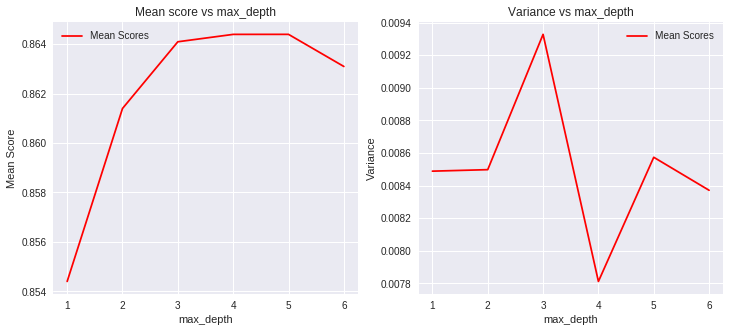

In [37]:
x = range(1, 7)
means = []
variances = []
import sys
for i in x:
  sys.stdout.write(f'\r Running {i}/{len(x)}')
  model = XGBClassifier(max_depth = i)
  mean, variance = get_cross_validation(X, y, model, cv = 10, out = False, variance = True)
  means.append(mean)
  variances.append(variance)
  sys.stdout.flush()
  if i == x[-1]:
    sys.stdout.write(f'\r Done {i}/{len(x)}')

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title('Mean score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Score')
plt.plot(x, means, c = 'r', label = 'Mean Scores')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Variance vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Variance')
plt.plot(x, variances, c = 'r', label = 'Mean Scores')
plt.legend()
plt.show()